<a href="https://colab.research.google.com/github/rjroxx/Deep-Learning/blob/master/DL_Test_2_J021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import cv2
import PIL.Image
import os

In [0]:
!unzip "/content/drive/My Drive/UCMerced_LandUse.zip"

Archive:  /content/drive/My Drive/Images.zip
replace Images/agricultural/agricultural00.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Images/agricultural/agricultural00.tif  
replace Images/agricultural/agricultural01.tif? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Images/agricultural/agricultural01.tif  
  inflating: Images/agricultural/agricultural02.tif  
  inflating: Images/agricultural/agricultural03.tif  
  inflating: Images/agricultural/agricultural04.tif  
  inflating: Images/agricultural/agricultural05.tif  
  inflating: Images/agricultural/agricultural06.tif  
  inflating: Images/agricultural/agricultural07.tif  
  inflating: Images/agricultural/agricultural08.tif  
  inflating: Images/agricultural/agricultural09.tif  
  inflating: Images/agricultural/agricultural10.tif  
  inflating: Images/agricultural/agricultural11.tif  
  inflating: Images/agricultural/agricultural12.tif  
  inflating: Images/agricultural/agricultural13.tif  
  inflating: Images/agr

In [0]:
X=[]
Z=[]
IMG_SIZE=150
AGRICULTURAL_DIR='/content/Images/agricultural' 
AIRPLANE_DIR='/content/Images/airplane'
BASEBALLDIAMOND_DIR='/content/Images/baseballdiamond'
BEACH_DIR='/content/Images/beach'
BUILDINGS_DIR='/content/Images/buildings'
CHAPARRAL_DIR='/content/Images/chaparral'
DENSERESIDENTIAL_DIR='/content/Images/denseresidential'
FOREST_DIR='/content/Images/forest'
FREEWAY_DIR='/content/Images/freeway'
GOLFCOURSE_DIR='/content/Images/golfcourse'
HARBOR_DIR='/content/Images/harbor'
INTERSECTION_DIR='/content/Images/intersection'
MEDIUMRESIDENTIAL_DIR='/content/Images/mediumresidential'
MOBILEHOMEPARK_DIR='/content/Images/mobilehomepark'
OVERPASS_DIR='/content/Images/overpass'
PARKINGLOT_DIR='/content/Images/parkinglot'
RIVER_DIR='/content/Images/river'
RUNWAY_DIR='/content/Images/runway'
SPARSERESIDENTIAL_DIR='/content/Images/sparseresidential'
STORAGETANKS_DIR='/content/Images/storagetanks'
TENNISCOURT_DIR='/content/Images/tenniscourt'

In [0]:
def assign_label(img,image_type):
    return image_type

def make_train_data(image_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,image_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [0]:
from tqdm import tqdm
make_train_data('Agricultural',AGRICULTURAL_DIR)
print(len(X))
make_train_data('Airplane',AIRPLANE_DIR)
print(len(X))
make_train_data('Baseball Diamond',BASEBALLDIAMOND_DIR)
print(len(X))
make_train_data('Beach',BEACH_DIR)
print(len(X))
make_train_data('Buildings',BUILDINGS_DIR)
print(len(X))
make_train_data('Chaparral',CHAPARRAL_DIR)
print(len(X))
make_train_data('Dense Residential',DENSERESIDENTIAL_DIR)
print(len(X))
make_train_data('Forest',FOREST_DIR)
print(len(X))
make_train_data('Freeway',FREEWAY_DIR)
print(len(X))
make_train_data('Golfcourse',GOLFCOURSE_DIR)
print(len(X))
make_train_data('Harbor',HARBOR_DIR)
print(len(X))
make_train_data('Intersection',INTERSECTION_DIR)
print(len(X))
make_train_data('Medium Residential',MEDIUMRESIDENTIAL_DIR)
print(len(X))
make_train_data('Mobile Home Park',MOBILEHOMEPARK_DIR)
print(len(X))
make_train_data('Overpass',OVERPASS_DIR)
print(len(X))
make_train_data('Parking Lot',PARKINGLOT_DIR)
print(len(X))
make_train_data('River',RIVER_DIR)
print(len(X))
make_train_data('Runway',RUNWAY_DIR)
print(len(X))
make_train_data('Sparse Residential',SPARSERESIDENTIAL_DIR)
print(len(X))
make_train_data('Storage Tanks',STORAGETANKS_DIR)
print(len(X))
make_train_data('Tennis Court',TENNISCOURT_DIR)
print(len(X))

  0%|          | 0/100 [00:00<?, ?it/s]

100
200
300


  0%|          | 0/100 [00:00<?, ?it/s]

400
500
600


  0%|          | 0/100 [00:00<?, ?it/s]

700
800
900


  0%|          | 0/100 [00:00<?, ?it/s]

1000
1100
1200


  0%|          | 0/100 [00:00<?, ?it/s]

1300
1400
1500


  0%|          | 0/100 [00:00<?, ?it/s]

1600
1700
1800


100%|██████████| 100/100 [00:00<00:00, 1107.92it/s]

1900
2000
2100


In [0]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,21)
X=np.array(X)
X=X/255

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [0]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(21, activation = "softmax"))

In [0]:
batch_size=21
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True,  
        vertical_flip=False)  


datagen.fit(x_train)

In [0]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 96)       

In [0]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test), 
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
75/75 [==============================] - 97s 1s/step - loss: 0.1912 - acc: 0.9524 - val_loss: 0.1893 - val_acc: 0.9524
Epoch 2/50
75/75 [==============================] - 95s 1s/step - loss: 0.1854 - acc: 0.9523 - val_loss: 0.1802 - val_acc: 0.9503
Epoch 3/50
75/75 [==============================] - 96s 1s/step - loss: 0.1701 - acc: 0.9525 - val_loss: 0.1593 - val_acc: 0.9524
Epoch 4/50
75/75 [==============================] - 95s 1s/step - loss: 0.1515 - acc: 0.9541 - val_loss: 0.1413 - val_acc: 0.9521
Epoch 5/50
75/75 [==============================] - 96s 1s/step - loss: 0.1384 - acc: 0.9552 - val_loss: 0.1314 - val_acc: 0.9576
Epoch 6/50
75/75 [==============================] - 97s 1s/step - loss: 0.1226 - acc: 0.9589 - val_loss: 0.1001 - val_acc: 0.9651
Epoch 7/50
75/75 [==============================] - 97s 1s/step - loss: 0.1141 - acc: 0.9610 - val_loss: 0.0962 - val_acc: 0.9643
Epoch 8/50
75/75 [==============================] - 97s 1s/step - loss: 0.1073 - acc: 0.96

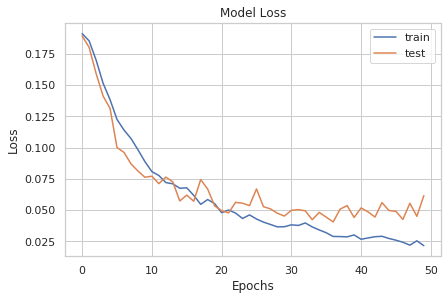

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

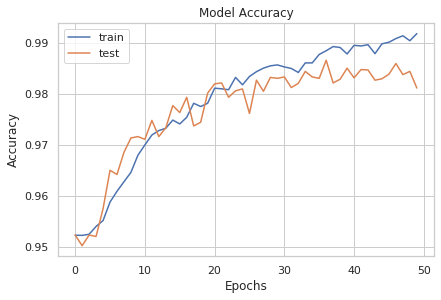

In [0]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


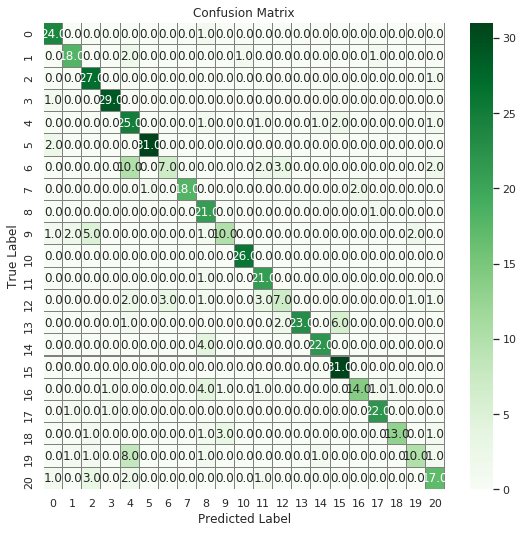

In [0]:
import seaborn as sns
Y_pred = model.predict(x_test)

Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()